In [286]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [287]:
df = pd.read_csv('Опрос про отношение к свободному ПО.csv')
preferences = df.columns.to_list()[1:9]
open_source_preferences = preferences[:3]
conf_preferences = preferences[3:5]
not_manipulation_preferences = preferences[5:]
new_df = df.copy()
new_df = new_df.assign(Предпочтения_opensource = 
                       sum(df[pref] - 1 for pref in open_source_preferences) / len(open_source_preferences) / 4) 
new_df = new_df.assign(Предпочтения_конфиденциальности = 
                       sum(df[pref] - 1 for pref in conf_preferences) / len(conf_preferences) / 4) 
new_df = new_df.assign(Предпочтения_автономности = 
                       sum(df[pref] - 1 for pref in not_manipulation_preferences) / len(not_manipulation_preferences) / 4) 

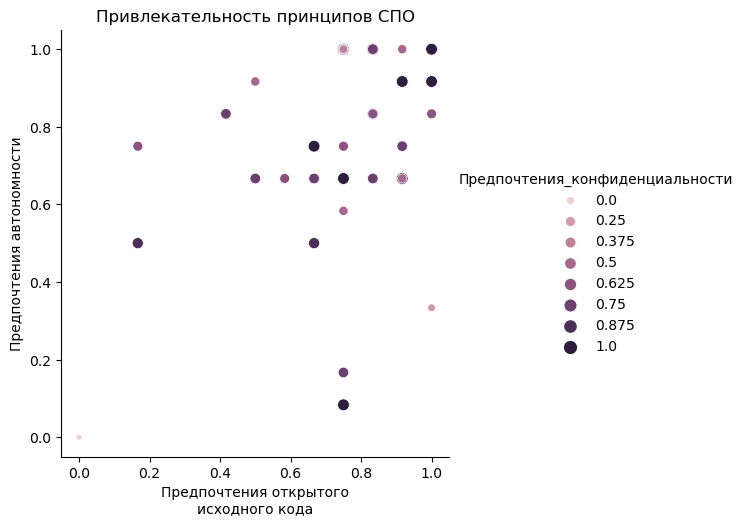

In [288]:
sns.relplot(data=new_df, 
            x="Предпочтения_opensource", 
            y="Предпочтения_автономности",
            hue='Предпочтения_конфиденциальности', 
            size='Предпочтения_конфиденциальности', legend="full").set(title='Привлекательность принципов СПО',\
                                                                      xlabel='Предпочтения открытого\nисходного кода',
                                                                      ylabel='Предпочтения автономности')

In [289]:
new_df['Предпочтения_opensource'].describe()

count    44.000000
mean      0.757576
std       0.265245
min       0.000000
25%       0.666667
50%       0.833333
75%       1.000000
max       1.000000
Name: Предпочтения_opensource, dtype: float64

In [290]:
new_df['Предпочтения_конфиденциальности'].describe()

count    44.000000
mean      0.767045
std       0.263572
min       0.000000
25%       0.625000
50%       0.812500
75%       1.000000
max       1.000000
Name: Предпочтения_конфиденциальности, dtype: float64

In [291]:
new_df['Предпочтения_автономности'].describe()

count    44.000000
mean      0.755682
std       0.281537
min       0.000000
25%       0.666667
50%       0.833333
75%       1.000000
max       1.000000
Name: Предпочтения_автономности, dtype: float64

In [292]:
print('Коэффициенты корреляции')
print('Между пр. автономности и конфиденциальности',
      new_df['Предпочтения_автономности'].corr(new_df['Предпочтения_конфиденциальности']))
print('Между пр. автономности и opensource:\t   ',
      new_df['Предпочтения_автономности'].corr(new_df['Предпочтения_opensource']))
print('Между пр. конфиденциальности и opensource: ',
      new_df['Предпочтения_конфиденциальности'].corr(new_df['Предпочтения_opensource']))

Коэффициенты корреляции
Между пр. автономности и конфиденциальности 0.527525386717434
Между пр. автономности и opensource:	    0.5919782388024697
Между пр. конфиденциальности и opensource:  0.5490594188740086


In [293]:
search = new_df.columns[9:15].to_list()
find = new_df.columns[16:19].to_list()
for col in search + find:
    d = {'Затрудняюсь ответить': 3, 
         'Иногда': 3,
         'Часто': 4}
    new_df[col] = [d[x] if x in d else float(x) for x in new_df[col]]
new_df = new_df.assign(search = sum(new_df[pref] - 1 for pref in search) / len(search) / 4) 
new_df = new_df.assign(find = sum(new_df[pref] - 1  for pref in find) / len(find) / 4) 

/tmp/ipykernel_26612/2073346598.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  sns.histplot(data=new_df, x=search[0], color="skyblue", discrete=True, ax=axs[0, 0], alpha=0.5)\
/tmp/ipykernel_26612/2073346598.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  sns.histplot(data=new_df, x=search[1], color="olive", discrete=True, ax=axs[0, 1], alpha=0.5)\
/tmp/ipykernel_26612/2073346598.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  sns.histplot(data=new_df, x=search[2], color="gold", discrete=True, ax=axs[1, 0], alpha=0.5)\
/tmp/ipykernel_26612/2073346598.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  sns.histplot(data=new_df, x=search[3], color="teal", discrete=True, ax=axs[1, 1], alpha=0.5)\


[Text(0, 0.5, 'Количество'),
 Text(0.5, 1.0, 'Поиск open-source программ'),
 [Text(0.0, 0, '0'),
  Text(1.0, 0, 'Нет'),
  Text(2.0, 0, 'Скорее\nнет'),
  Text(3.0, 0, 'Затрудняюсь\nответить'),
  Text(4.0, 0, 'Скорее\nда'),
  Text(5.0, 0, 'Да'),
  Text(6.0, 0, '')],
 Text(0.5, 0, '')]

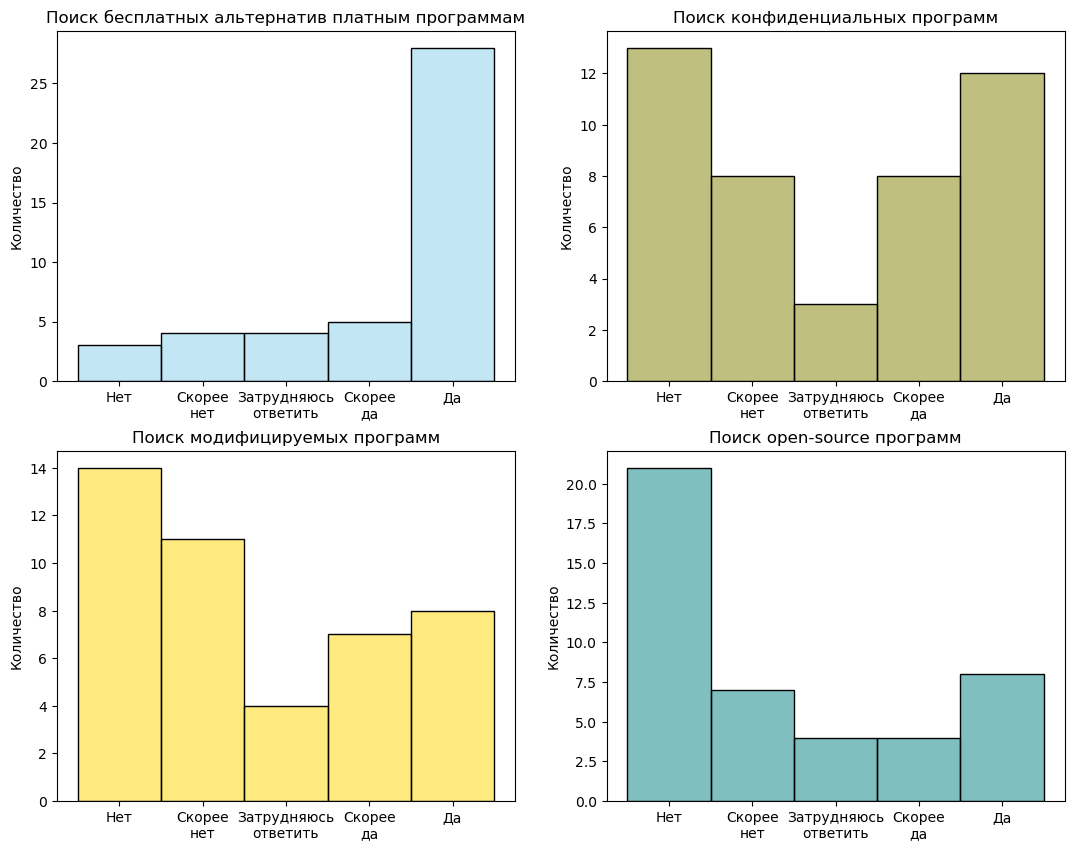

In [294]:
l = [0,'Нет', 'Скорее\nнет', 'Затрудняюсь\nответить', 'Скорее\nда', 'Да']
l_2 = [0,'Очень\nнизкая', 'Низкая', 'Затрудняюсь\nответить', 'Высокая', 'Очень\nвысокая']
l_3 = [0,'Очень\nредко', 'Редко', 'Иногда', 'Часто', 'Очень\nчасто']
fig, axs = plt.subplots(2, 2, figsize=(13, 10))

sns.histplot(data=new_df, x=search[0], color="skyblue", discrete=True, ax=axs[0, 0], alpha=0.5)\
.set(ylabel='Количество', title='Поиск бесплатных альтернатив платным программам',  xticklabels=l, xlabel='')
sns.histplot(data=new_df, x=search[1], color="olive", discrete=True, ax=axs[0, 1], alpha=0.5)\
.set(ylabel='Количество', title='Поиск конфиденциальных программ',  xticklabels=l,xlabel='')
sns.histplot(data=new_df, x=search[2], color="gold", discrete=True, ax=axs[1, 0], alpha=0.5)\
.set(ylabel='Количество', title='Поиск модифицируемых программ', xticklabels=l, xlabel='')
sns.histplot(data=new_df, x=search[3], color="teal", discrete=True, ax=axs[1, 1], alpha=0.5)\
.set(ylabel='Количество', title='Поиск open-source программ', xticklabels=l, xlabel='')


/tmp/ipykernel_26612/4198511817.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  sns.histplot(data=new_df, x=search[4], color="red", discrete=True, ax=axs[0], alpha=0.5)\
/tmp/ipykernel_26612/4198511817.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  sns.histplot(data=new_df, x=search[5], color="blue", discrete=True, ax=axs[1], alpha=0.5)\


[Text(0, 0.5, 'Количество'),
 Text(0.5, 1.0, 'Готовность потратить время на обучение open-source программам'),
 [Text(0.0, 0, '0'),
  Text(1.0, 0, 'Очень\nнизкая'),
  Text(2.0, 0, 'Низкая'),
  Text(3.0, 0, 'Затрудняюсь\nответить'),
  Text(4.0, 0, 'Высокая'),
  Text(5.0, 0, 'Очень\nвысокая'),
  Text(6.0, 0, '')],
 Text(0.5, 0, '')]

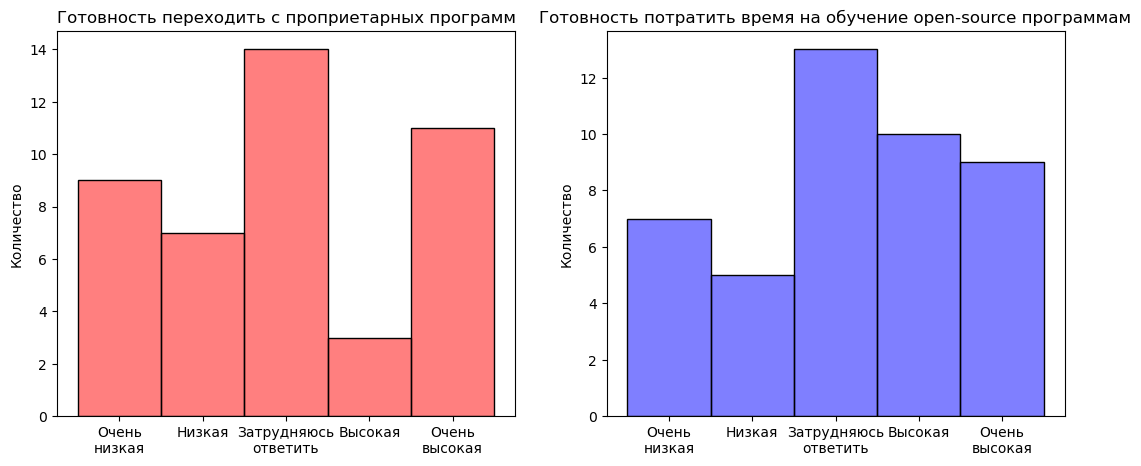

In [295]:
fig, axs = plt.subplots(1, 2, figsize=(13, 5))
sns.histplot(data=new_df, x=search[4], color="red", discrete=True, ax=axs[0], alpha=0.5)\
.set(ylabel='Количество', title='Готовность переходить с проприетарных программ',xticklabels=l_2, xlabel='')
sns.histplot(data=new_df, x=search[5], color="blue", discrete=True, ax=axs[1], alpha=0.5)\
.set(ylabel='Количество', title='Готовность потратить время на обучение open-source программам',
      xticklabels=l_2, xlabel='')

/tmp/ipykernel_26612/3358761882.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  sns.histplot(data=new_df, x=find[0], color="skyblue", discrete=True, ax=axs[0], alpha=0.5)\
/tmp/ipykernel_26612/3358761882.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  sns.histplot(data=new_df, x=find[1], color="olive", discrete=True, ax=axs[1], alpha=0.5)\
/tmp/ipykernel_26612/3358761882.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  sns.histplot(data=new_df, x=find[2], color="gold", discrete=True, ax=axs[2], alpha=0.5)\


[Text(0, 0.5, 'Количество'),
 Text(0.5, 1.0, 'СПО оказывалось удовлетворительным'),
 [Text(0.0, 0, '0'),
  Text(1.0, 0, 'Очень\nредко'),
  Text(2.0, 0, 'Редко'),
  Text(3.0, 0, 'Иногда'),
  Text(4.0, 0, 'Часто'),
  Text(5.0, 0, 'Очень\nчасто'),
  Text(6.0, 0, '')],
 Text(0.5, 0, '')]

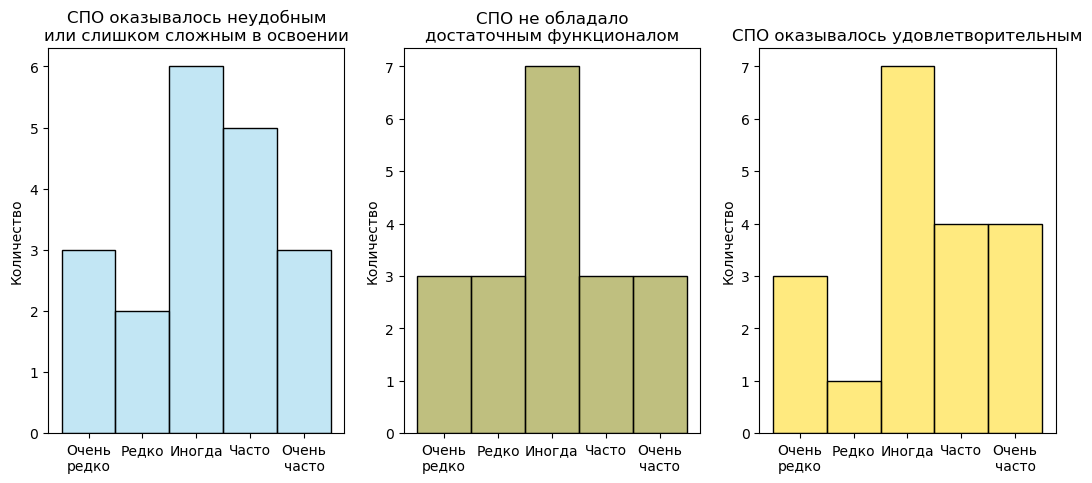

In [296]:
fig, axs = plt.subplots(1, 3, figsize=(13, 5))

sns.histplot(data=new_df, x=find[0], color="skyblue", discrete=True, ax=axs[0], alpha=0.5)\
.set(ylabel='Количество', title='СПО оказывалось неудобным\nили слишком сложным в освоении',  xticklabels=l_3, xlabel='')
sns.histplot(data=new_df, x=find[1], color="olive", discrete=True, ax=axs[1], alpha=0.5)\
.set(ylabel='Количество', title='СПО не обладало\nдостаточным функционалом',  xticklabels=l_3,xlabel='')
sns.histplot(data=new_df, x=find[2], color="gold", discrete=True, ax=axs[2], alpha=0.5)\
.set(ylabel='Количество', title='СПО оказывалось удовлетворительным', xticklabels=l_3, xlabel='')
